In [40]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [41]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression


In [42]:
#import Kfold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *


In [43]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# import train_test_split
from sklearn.model_selection import train_test_split


In [45]:
from imblearn.over_sampling import SMOTE


In [64]:
#import XGBoost
import xgboost as xgb


ModuleNotFoundError: No module named 'xgboost'

In [46]:
#set viewing options
pd.set_option('display.width', 1000)  # Set the maximum width of the display
pd.set_option('display.max_columns', None)  # Display all columns without truncation
np.set_printoptions(linewidth=150)

In [47]:
X_df = pd.read_csv('X_df_normalized.csv', sep= ',')
y_df = pd.read_csv('y_df.csv', sep = ',')
whole_csv = pd.read_csv('whole_csv.csv')
X_df['wine_type'] = whole_csv['wine_type_white']
print(X_df.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol  wine_type
0       0.264463          0.126667     0.216867        0.308282   0.059801             0.152778              0.377880  0.267785  0.217054   0.129213  0.115942        1.0
1       0.206612          0.146667     0.204819        0.015337   0.066445             0.045139              0.290323  0.132832  0.449612   0.151685  0.217391        1.0
2       0.355372          0.133333     0.240964        0.096626   0.068106             0.100694              0.209677  0.154039  0.418605   0.123596  0.304348        1.0
3       0.280992          0.100000     0.192771        0.121166   0.081395             0.159722              0.414747  0.163678  0.364341   0.101124  0.275362        1.0
4       0.198347          0.160000     0.096386        0.098160   0.059801             0.100694              0.299539  0.150183  0.356589   0.140449  

In [48]:
print(X_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol  wine_type
0       0.264463          0.126667     0.216867        0.308282   0.059801             0.152778              0.377880  0.267785  0.217054   0.129213  0.115942        1.0
1       0.206612          0.146667     0.204819        0.015337   0.066445             0.045139              0.290323  0.132832  0.449612   0.151685  0.217391        1.0
2       0.355372          0.133333     0.240964        0.096626   0.068106             0.100694              0.209677  0.154039  0.418605   0.123596  0.304348        1.0
3       0.280992          0.100000     0.192771        0.121166   0.081395             0.159722              0.414747  0.163678  0.364341   0.101124  0.275362        1.0
4       0.198347          0.160000     0.096386        0.098160   0.059801             0.100694              0.299539  0.150183  0.356589   0.140449  

In [49]:
#work out evaluation metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division = 1)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [50]:
'''Logistic regression for Kfolds'''
#Where X is a DF with my dependent variables and Y is a series containing encoded values
def log_regress_k(X, Y):
    Y = np.ravel(Y)
    #creating an instance of the decision Tree classifier
    hyperparameters = {'C': 44.34610579156945, 'class_weight': None, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}
    lr = LogisticRegression(**hyperparameters)
    #how many 'folds' do we want
    n_folds = 5
    #initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits= n_folds, shuffle = True, random_state=42)
    
    #used to hold results from each loop 
    accuracy_list, precision_list, recall_list, f1_list, kappa_list = [], [], [], [], []

    #because n_folds= 5 this for loop should run 3 times
    #it will return two lists of indexes - 1 for the training: X and 1 for the test: Y
    for train, test in skf.split(X ,Y):
        #we isolate the appropriate indexes for our training and our testing
        X_train_k, X_test_k = X.loc[train], X.loc[test]
        y_train_k, y_test_k = Y[train], Y[test]

        #we enter our training data in to the instance of DecisionTreeClassifier we created
        lr.fit(X_train_k, y_train_k)
        #we test our model by entering our test X ie. the DF with our variables we have not used so far
        y_pred = lr.predict(X_test_k)
        conf_matrix = confusion_matrix(y_test_k, y_pred)
        conf_matrix_df = pd.DataFrame(conf_matrix, index = ['low', 'medium', 'high'], columns = ['pred_low', 'pred_med', 'pred_high'])
        plt.figure(figsize = (3,3))
        sns.heatmap(conf_matrix_df, annot = True, cmap ='Blues', fmt= 'd', cbar= False)
        plt.show()
        #use the inbuilt compute_metrics to get the accuracy, precision, recall and f1 stats and add them to our container lists
        accuracy, precision, recall, f1 = compute_metrics(y_test_k, y_pred)
        
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        kappa_score = cohen_kappa_score(y_test_k, y_pred)
        kappa_list.append(kappa_score)



    #get the average of each our run throughs
    accuracy = np.mean(accuracy_list)
    precision = np.mean(precision_list)
  
    recall = np.mean(recall_list)
    
    f1 = np.mean(f1_list)
    kappa = np.mean(kappa_list)
    return [accuracy, precision, recall, f1, kappa]



/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


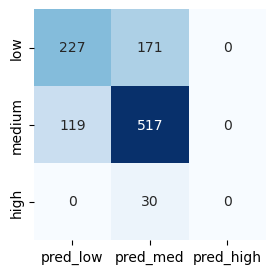

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


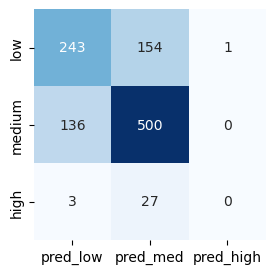

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


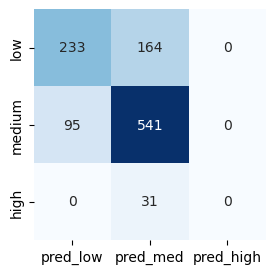

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


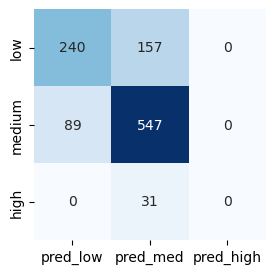

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


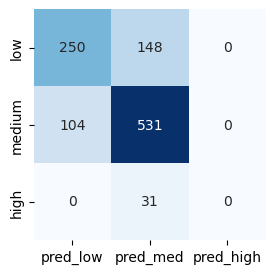

[0.7197368421052632,
 0.7200429360786875,
 0.7197368421052632,
 0.7053003467883193,
 0.411025224430437]

In [51]:
display(log_regress_k(X_df, y_df))

In [52]:
#feature importance
0.
#feature importance (the magnitude of its coefficient times the standard deviation of the corresponding parameter in the data.)
model = LogisticRegression()
model.fit(X_df, y_df)
g = pd.DataFrame(model.coef_, columns=X_df.columns, index= ("low", "medium", "high"))
display(g)

print(cross_val_score(model, X_df, y_df, cv=3))



/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type
low,0.067669,3.557333,-0.464990,-1.911514,0.954586,-2.454053,1.185546,0.78267,-0.843826,-1.782764,-5.172020,-0.064603
medium,0.009734,-2.546335,-0.474081,0.950976,-0.209383,1.030098,-0.725396,-0.18379,-0.008074,1.182265,0.663804,-0.367854
high,-0.077404,-1.010998,0.939071,0.960538,-0.745203,1.423956,-0.460150,-0.59888,0.851900,0.600499,4.508216,0.432457


NameError: name 'cross_val_score' is not defined

In [55]:
X_df_zSs_standardized = pd.read_csv('X_df_zSc_standardized.csv', sep= ',')

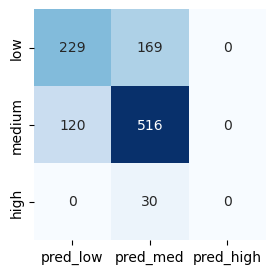

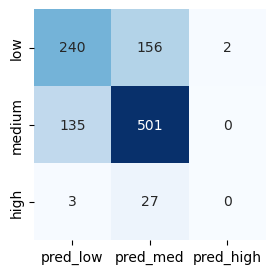

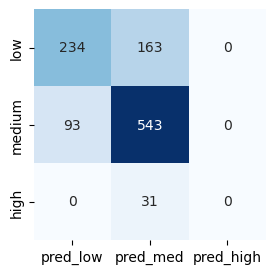

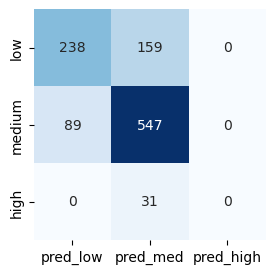

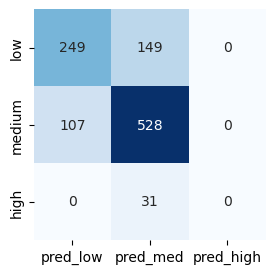

[0.718984962406015,
 0.71941342610161,
 0.718984962406015,
 0.7045937925262619,
 0.40950256540177354]

In [54]:
display(log_regress_k(X_df_zSs_standardized, y_df))

In [56]:
logreg_classifier = LogisticRegression()
param_dist = {
	'penalty': ['l1', 'l2', 'elasticnet', 'none'],
	'C': uniform(loc=0.001, scale=100),
	'fit_intercept': [True, False],
	'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
	'class_weight': [None, 'balanced']
}
random_search = RandomizedSearchCV(logreg_classifier, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=5)
# Fit the object to the data
random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print('______')
print(best_params)

NameError: name 'uniform' is not defined

In [57]:
X_df_colDrop = X_df[['volatile_acidity', 'density', 'alcohol']]


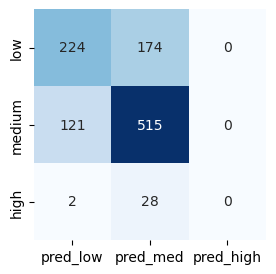

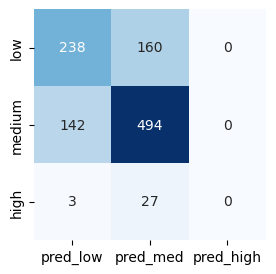

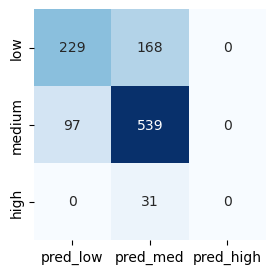

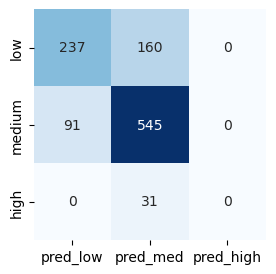

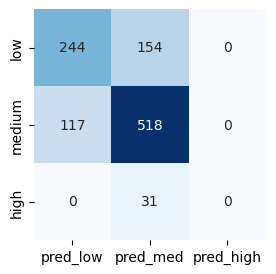

[0.7110902255639097,
 0.7168250733904376,
 0.7110902255639097,
 0.696629933444728,
 0.3930775214993437]

In [58]:
display(log_regress_k(X_df_colDrop, y_df))

[0.718984962406015,
 0.7192434135777628,
 0.718984962406015,
 0.7045346750999485,
 0.40936315935685813]

In [59]:
X_df_z = pd.read_csv('X_df_zSc_standardized.csv', sep= ',')
y_df_z = pd.read_csv('y_df.csv', sep = ',')
X_df_z['wine_type'] = whole_csv['wine_type_white']
print(X_df_z.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol  wine_type
0      -0.163070         -0.440639     0.282076        3.478304  -0.317143             0.840478              0.984535  2.180171 -1.400959  -0.556721 -1.475130        1.0
1      -0.693555         -0.262314     0.146154       -0.766370  -0.208624            -0.900765              0.315155 -0.180525  0.469784  -0.289571 -0.884822        1.0
2       0.670550         -0.381197     0.553919        0.411472  -0.181494            -0.002059             -0.301380  0.190441  0.220351  -0.623508 -0.378844        1.0
3      -0.011503         -0.678405     0.010232        0.767046   0.035544             0.952816              1.266380  0.359062 -0.216155  -0.890658 -0.547503        1.0
4      -0.769339         -0.143431    -1.077141        0.433695  -0.317143            -0.002059              0.385616  0.122993 -0.278513  -0.423146 -

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'alcohol', 'wine_type'], dtype='object')


KeyError: "['sulphates', 'chlorides'] not found in axis"

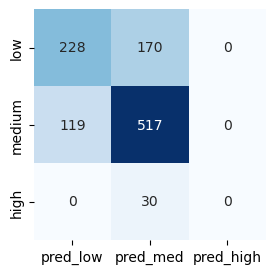

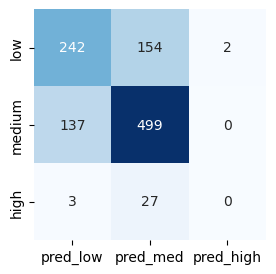

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


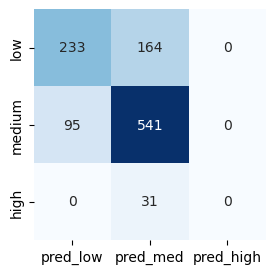

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


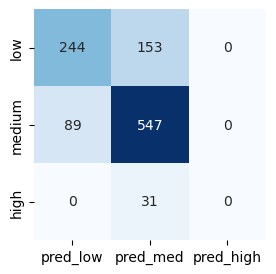

/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


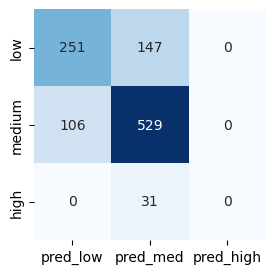

[0.7201127819548873,
 0.7205306204448416,
 0.7201127819548873,
 0.7058848791219626,
 0.4123792113405075]

In [60]:
display(log_regress_k(X_df_z, y_df))